In [1]:
import pandas as pd             
import matplotlib.pyplot as plt   

In [2]:
#Import the dataset

gdp = pd.read_excel("gdp_rate.xls", index_col = "Year", header = 5)
gdp = gdp.rename(columns={"Gross domestic product":"gdp_rate"})
#gdp

In [3]:
suicide = pd.read_excel("suicide_rate.xlsx", usecols=[1,3,4] , skipfooter = 58)
#suicide = suicide.rename(columns={"Crude Rate":"Suicide_Rate"})
suicide['crude'] = suicide['Deaths'] / suicide['Population'] *100000
suicide['Suicide_Rate'] = suicide['crude'].pct_change()*100 
suicide = suicide.set_index('Year')
suicide = suicide.loc["2002":"2016"]
#suicide

In [4]:
income = pd.read_excel("incomerate.xls", header = 6, skipfooter = 4)
income = income.rename(columns={"GeoName":"Year", "United States":"Income_rate"})
income = income.set_index("Year")
#income

In [5]:
unempoly = pd.read_excel("unemployment.xls", header = 10)
unempoly = unempoly.rename(columns={"observation_date":"Year", "UNRATE_CH1":"Unempoly_rate"})
unempoly['Year'] = unempoly['Year'].astype(str)
unempoly['Year'] = unempoly['Year'].str.replace('-01-01','')
unempoly = unempoly.set_index("Year")
#unempoly

In [6]:
houseprice = pd.read_excel("houseprice.xls", header = 10)
houseprice = houseprice.rename(columns={"observation_date":"Year"})
houseprice['Year'] = houseprice['Year'].astype(str)
houseprice['Year'] = houseprice['Year'].str.replace('-01-01','')
houseprice = houseprice.set_index("Year")
houseprice['Houseprice_rate'] = houseprice['ASPUS'].pct_change()*100 
houseprice = houseprice.drop('2001', axis = 0)
houseprice = houseprice.drop('ASPUS', axis = 1)
#houseprice

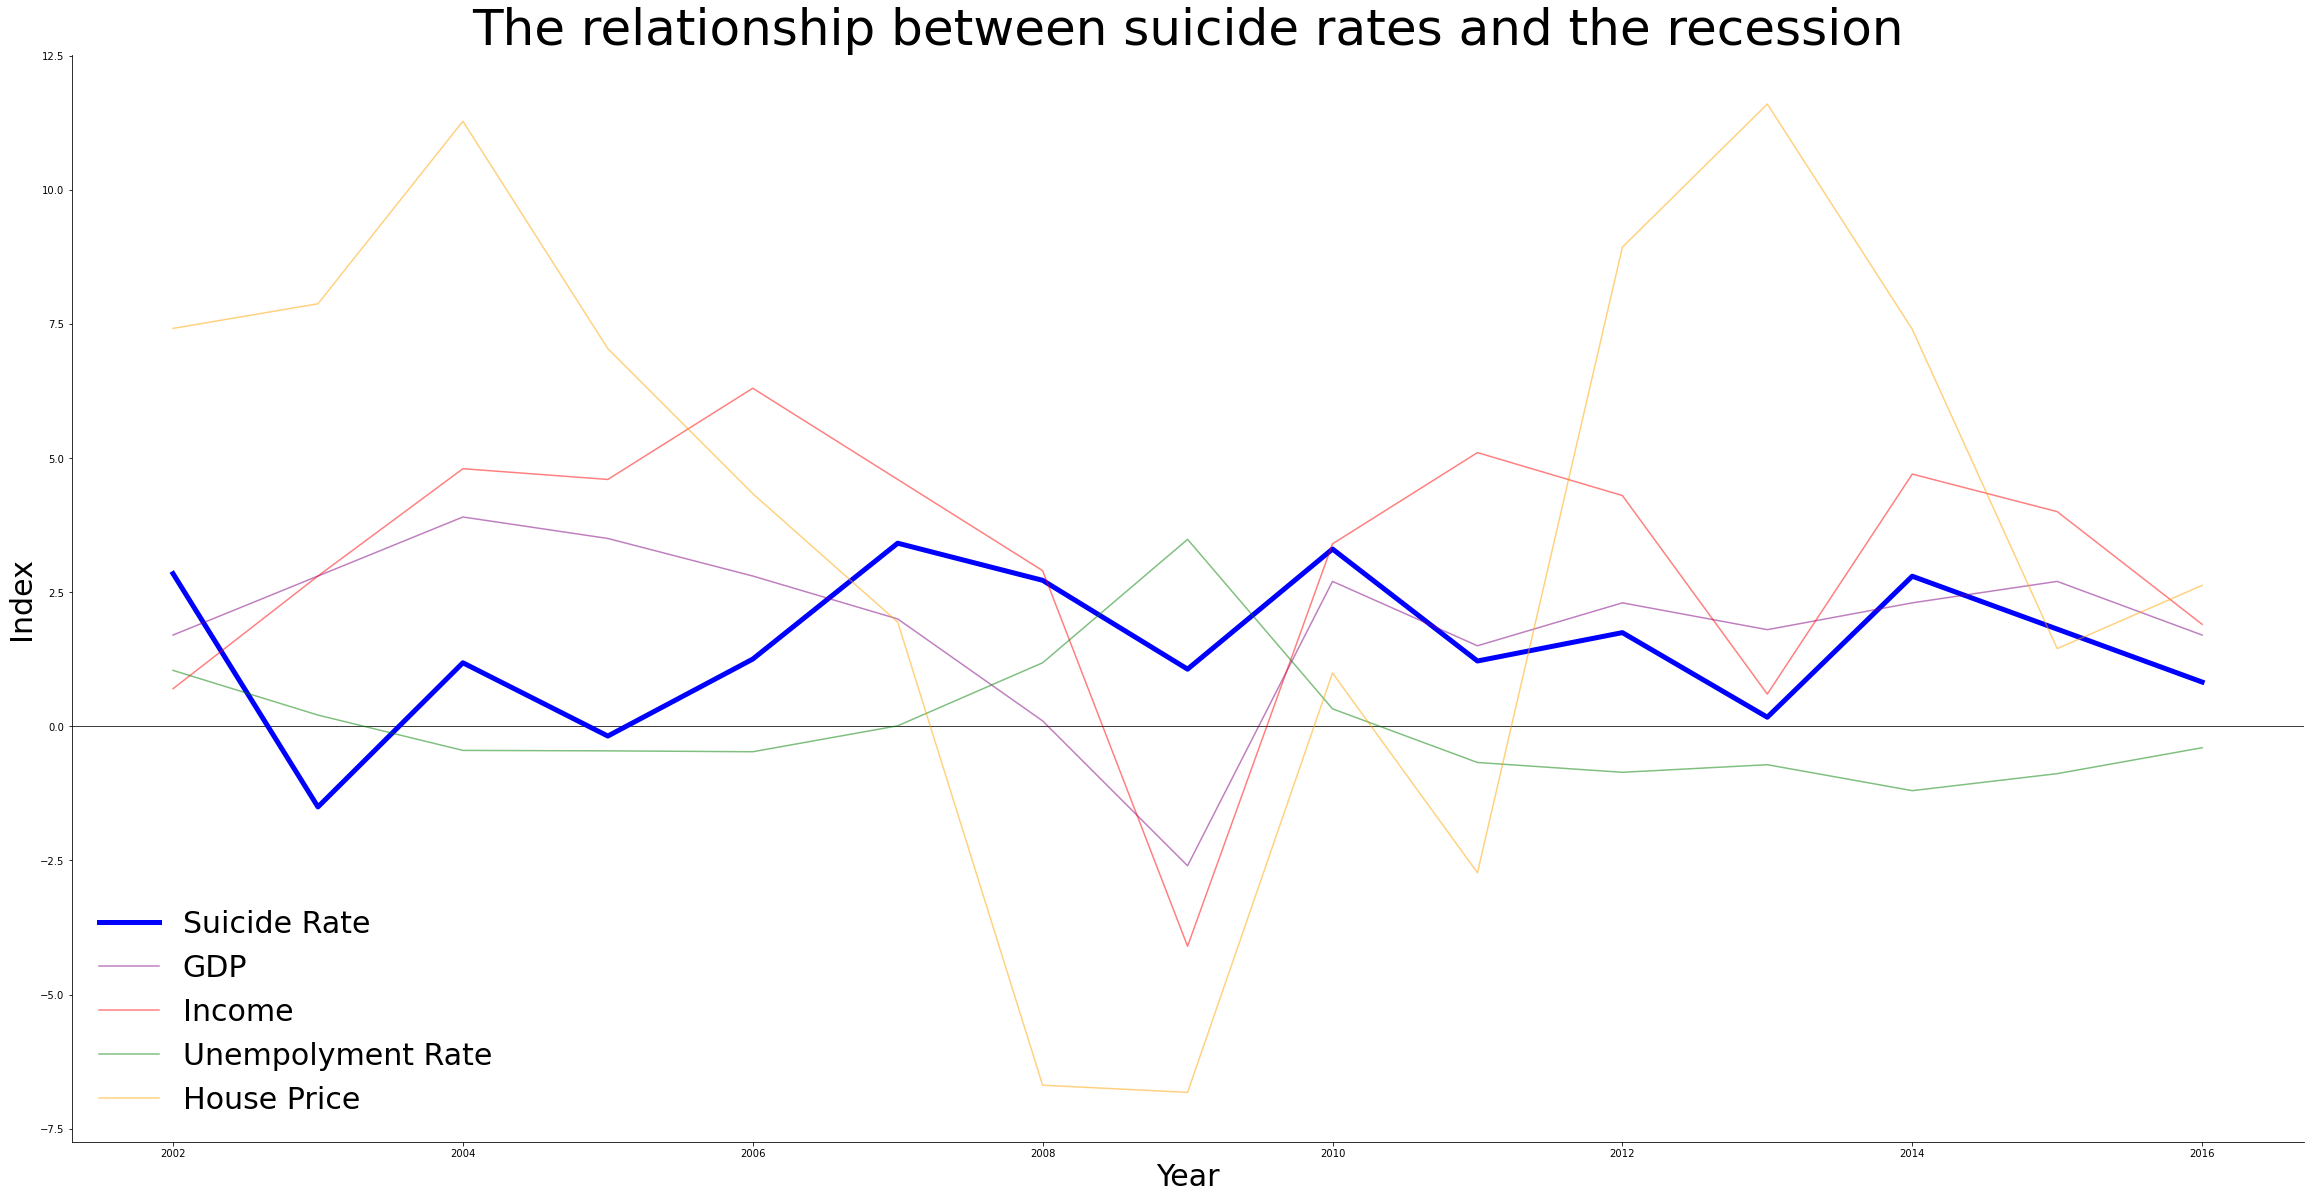

In [21]:
#Plot the dataset.
fig, ax = plt.subplots(figsize=(40,20))

ax.axhline(y=0, color='black', linewidth=0.75)  
ax.plot(gdp.index, suicide['Suicide_Rate'], color='blue', label='Suicide Rate' , linewidth = 5)  
ax.plot(gdp.index, gdp['gdp_rate'], color='purple', alpha = 0.5, label='GDP')  
ax.plot(gdp.index, income['Income_rate'], color='red', alpha = 0.5, label='Income') 
ax.plot(gdp.index, unempoly['Unempoly_rate'], color='green', alpha = 0.5, label='Unempolyment Rate')  
ax.plot(gdp.index, houseprice['Houseprice_rate'], color='orange', alpha = 0.5, label='House Price')  

ax.set_title('The relationship between suicide rates and the recession', fontsize = 50)
ax.set_ylabel('Index', fontsize = 30)
ax.set_xlabel('Year', fontsize = 30)
ax.legend(frameon=False, fontsize = 30)

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)  

plt.savefig('1st.pdf')
plt.show()
